In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [3]:
fake_df = pd.read_csv('/kaggle/input/fake-and-real-news-dataset/Fake.csv')
real_df = pd.read_csv('/kaggle/input/fake-and-real-news-dataset/True.csv')

In [4]:
fake_df['label'] = 0  # Fake
real_df['label'] = 1  # Real

In [5]:
df = pd.concat([fake_df, real_df], axis=0).reset_index(drop=True)

In [6]:
print("📌 Data Info:")
print(df.info())

print("\n📌 Summary Statistics:")
print(df.describe(include='all'))

print("\n📌 Missing Values:")
print(df.isnull().sum())

📌 Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   label    44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.7+ MB
None

📌 Summary Statistics:
                                                    title   text  \
count                                               44898  44898   
unique                                              38729  38646   
top     Factbox: Trump fills top jobs for his administ...          
freq                                                   14    627   
mean                                                  NaN    NaN   
std                                                   NaN    NaN   
min                                                   NaN    NaN  

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128240 (\N{NEWSPAPER}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


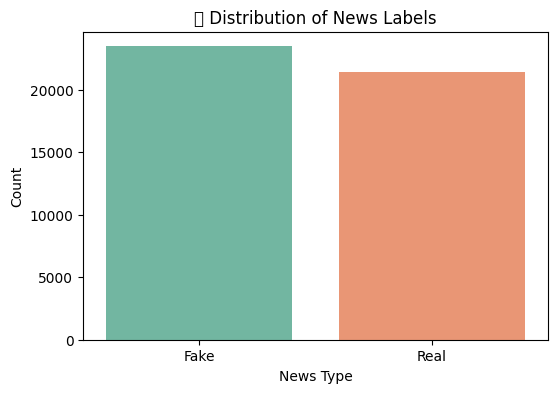

In [7]:
# ✅ Plot Label Counts
plt.figure(figsize=(6, 4))
sns.countplot(x='label', data=df, palette='Set2')
plt.title("📰 Distribution of News Labels")
plt.xticks([0, 1], ['Fake', 'Real'])
plt.xlabel("News Type")
plt.ylabel("Count")
plt.show()

In [9]:
# ✅ Add Word Count Column
df['word_count'] = df['text'].apply(lambda x: len(str(x).split()))

# ✅ Word Count Summary
print("\n📌 Word Count Stats:")
print(df['word_count'].describe())


📌 Word Count Stats:
count    44898.000000
mean       405.282284
std        351.265595
min          0.000000
25%        203.000000
50%        362.000000
75%        513.000000
max       8135.000000
Name: word_count, dtype: float64


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

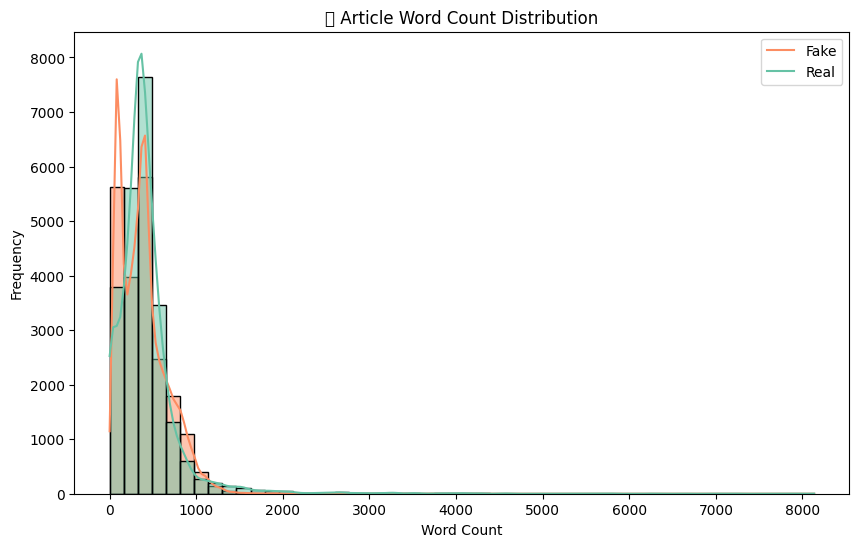

In [10]:
# ✅ Plot Article Length Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='word_count', hue='label', bins=50, kde=True, palette='Set2')
plt.title("📊 Article Word Count Distribution")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.legend(labels=['Fake', 'Real'])
plt.show()

In [11]:
# ✅ Optional: Word Cloud (Requires `wordcloud` library)
from wordcloud import WordCloud

fake_text = " ".join(fake_df['text'].dropna().tolist())
real_text = " ".join(real_df['text'].dropna().tolist())

plt.figure(figsize=(16, 6))

<Figure size 1600x600 with 0 Axes>

<Figure size 1600x600 with 0 Axes>

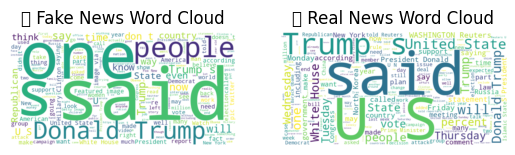

In [13]:
# Fake News Word Cloud
plt.subplot(1, 2, 1)
wc_fake = WordCloud(width=800, height=400, background_color='white').generate(fake_text)
plt.imshow(wc_fake, interpolation='bilinear')
plt.axis('off')
plt.title("🌩️ Fake News Word Cloud")

# Real News Word Cloud
plt.subplot(1, 2, 2)
wc_real = WordCloud(width=800, height=400, background_color='white').generate(real_text)
plt.imshow(wc_real, interpolation='bilinear')
plt.axis('off')
plt.title("🌤️ Real News Word Cloud")

plt.show()

In [14]:
df.to_csv("news_combined.csv", index=False)